In [111]:
import os
import pandas as pd
import seaborn as sns

In [112]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [113]:
root_path1 = '/home/lizhuoyuan/MyProjects/LAINR-simplified/src/results/sw/sw_CAE_h32_k5_ReZero_default_none_none'
root_path2 = '/home/lizhuoyuan/MyProjects/LAINR-simplified/src/results/sw/sw_AEflow_b4_k5_ReZero_default_none_none'
root_path3 = '/home/lizhuoyuan/MyProjects/LAINR-simplified/src/results/sw/sw_SINRv11_default_NeuralODE_default_none_none'

In [114]:
import glob

df1 = pd.concat([pd.read_pickle(f) for f in glob.glob(root_path1 + "/*dataframe.pkl")], ignore_index=True)
df2 = pd.concat([pd.read_pickle(f) for f in glob.glob(root_path2 + "/*dataframe.pkl")], ignore_index=True)
df3 = pd.concat([pd.read_pickle(f) for f in glob.glob(root_path3 + "/*dataframe.pkl")], ignore_index=True)

df = pd.concat([df1, df2, df3], ignore_index=True)

In [115]:
df[df == 'CAE_h32_k5'] = 'CAE'
df[df == 'AEflow_b4_k5'] = 'AEflow'
df[df == 'SINRv11_default'] = 'SINR'

df[df == 'ReZero_default'] = 'ReZero'
df[df == 'NeuralODE_default'] = 'NeuralODE'

In [116]:
df['surrogate model']=df['ed_name']+'+'+df['ld_name']
df

,ed_name,ld_name,ue_name,kf_name,sigma_z_b,sigma_x_b,sigma_m,rmse,ratio,surrogate model
0,CAE,ReZero,none_none,EnKF,0.010,0.1,0.100,0.567662,1.0,CAE+ReZero
1,CAE,ReZero,none_none,SEnKF,0.010,0.1,0.100,0.735870,1.0,CAE+ReZero
2,CAE,ReZero,none_none,DEnKF,0.010,0.1,0.100,0.531318,1.0,CAE+ReZero
3,CAE,ReZero,none_none,ETKF,0.010,0.1,0.100,0.524718,1.0,CAE+ReZero
4,CAE,ReZero,none_none,ETKF-Q,0.010,0.1,0.100,0.491303,1.0,CAE+ReZero
...,...,...,...,...,...,...,...,...,...,...
130,SINR,NeuralODE,none_none,EnKF,0.001,0.1,0.003,0.059762,1.0,SINR+NeuralODE
131,SINR,NeuralODE,none_none,SEnKF,0.001,0.1,0.003,0.086726,1.0,SINR+NeuralODE
132,SINR,NeuralODE,none_none,DEnKF,0.001,0.1,0.003,0.059062,1.0,SINR+NeuralODE
133,SINR,NeuralODE,none_none,ETKF,0.001,0.1,0.003,0.061706,1.0,SINR+NeuralODE


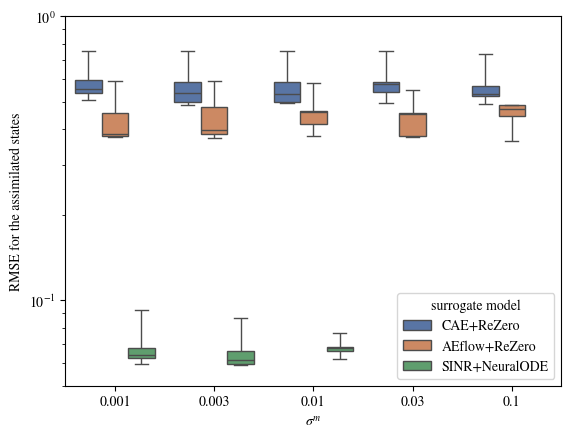

In [117]:
ax = sns.boxplot(df[df['sigma_m']>3e-4], x='sigma_m', y='rmse', hue='surrogate model', palette='deep', whis=(0, 100))
ax.set_yscale('log')
ax.set_ylim(5e-2, 1.)
ax.set_xlabel(r'$\sigma^m$')
ax.set_ylabel('RMSE for the assimilated states')
plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

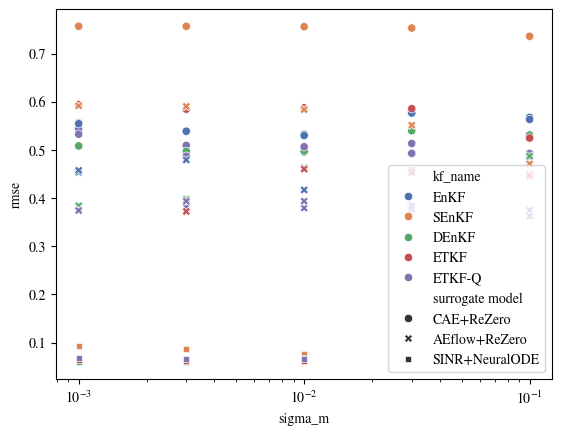

In [118]:
ax = sns.scatterplot(df[df['sigma_m'] > 3e-4], x='sigma_m', y='rmse',
                     hue='kf_name', style='surrogate model', palette='deep')
# ax.set_yscale('log')
ax.set_xscale('log')